In [1]:
# Preamble
from sympy import * 
from sympy.vector import *
init_printing() # gives latex formatted output

In [2]:
N = vector.CoordSys3D("")

In [3]:
moment_vec = 0 * N.i + 1 * N.j + 0 * N.k

In [4]:
x0,y0,z0 = symbols("x0, y0, z0") # declare some symbols associated with coordinate translation
N.z = 0 # reduce to 2d
z0 = 0 # reduce to 2d
position_vec = (N.x - x0) * N.i + (N.y - y0) * N.j + (N.z -z0) * N.k

In [5]:
position_abs = sqrt(position_vec.dot(position_vec))

In [6]:
surface = 1 / position_abs  # In 3d should have surface area of sphere (don't need factors of 4pi), something like 1/rabs^2.
                            # In 2d you drop a factgor of r so associate it with the side area of a cylinder of unit height??? seems to work

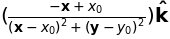

In [7]:
# Flux function associated with such a dipole
A_dip_vec = surface * moment_vec.cross(position_vec) / position_abs
A_dip_vec 

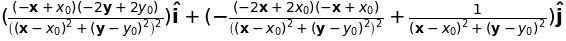

In [8]:
# Magnetic field associated with such a dipole 
B_dip_vec = curl(A_dip_vec)
B_dip_vec

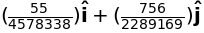

In [9]:
# This is an example how you can substitute into a sympy expression to evaluate at a point
B_dip_vec.subs([(N.x,0), (N.y,0), (x0,1), (y0,55)])

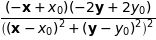

In [10]:
# This is how you access an individual component
B_dip_vec.coeff(N.i)

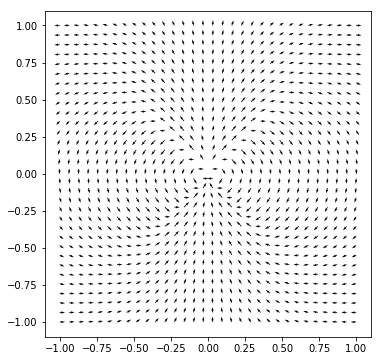

In [13]:
# Plot the field - unfortunately this isn't the one-liner it would be in Maple but at least its free
import matplotlib.pyplot as plt
import numpy as np
# Do this later

n = 32
gx = np.linspace(-1,1,n)
gy = np.linspace(-1,1,n)

bx = np.zeros([n,n])
by = np.zeros([n,n]) 

for iy in range(0,n):
    for ix in range(0,n):
        bx_evaluated = B_dip_vec.subs([(x0,0),(y0,0), (N.x,gx[ix]), (N.y,gy[iy])])
        bx_evaluated = bx_evaluated.coeff(N.i)
        bx[iy,ix] = bx_evaluated
        by_evaluated = B_dip_vec.subs([(x0,0),(y0,0), (N.x,gx[ix]), (N.y,gy[iy])])
        by_evaluated = by_evaluated.coeff(N.j)
        by[iy,ix] = by_evaluated
        #print(ix,iy,"x:", gx[ix], "y:",gy[iy], "bx_evaluated",bx_evaluated, bx[ix,iy])
        # normalise
        bx[iy,ix] = bx[iy,ix] / np.sqrt(bx[iy,ix]**2 + by[iy,ix]**2)
        by[iy,ix] = by[iy,ix] / np.sqrt(bx[iy,ix]**2 + by[iy,ix]**2)

plt.rcParams['figure.figsize'] = [9.5, 6]
plt.quiver(gx,gy,bx,by)
plt.gca().set_aspect('equal', adjustable='box')
